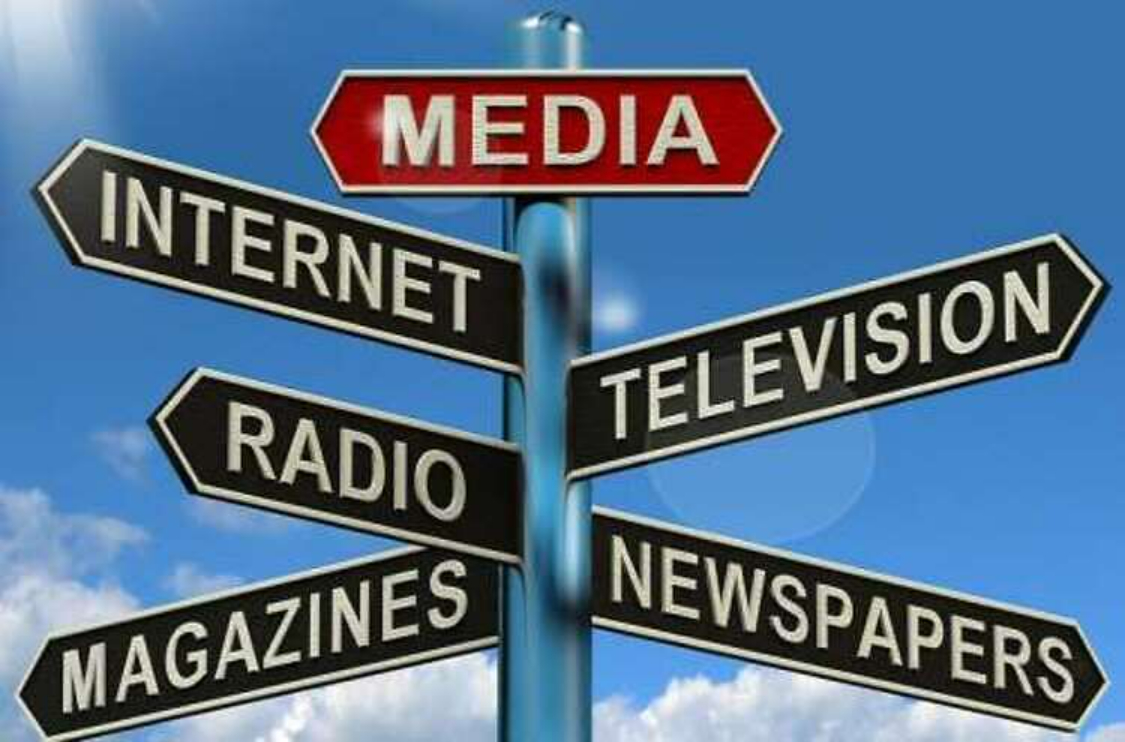

The advertising dataset captures the sales revenue generated with respect to advertisement costs across multiple channels like radio, tv, and newspapers.

It is required to understand the impact of ad budgets on the overall sales.

Objective:

    Understand the Dataset & cleanup (if required).
    Build Regression models to predict the sales w.r.t a single & multiple features.
    Also evaluate the models & compare their respective scores like R2, RMSE, etc.


# Basic Explore

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('Advertising Budget and Sales.xls')

In [3]:
print ('10 Data teratas sebagai berikut :')
df.head().style.set_properties(**{"background-color": "#FDD667","color":"black","border": "1.5px solid black"})

10 Data teratas sebagai berikut :


,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
print(f'Dataset terdiri dari {df.shape[0]} baris dan {df.shape[1]} kolom')

Dataset terdiri dari 200 baris dan 5 kolom


In [5]:
print ('Informasi dataset sebagai berikut:')
print(df.info())

Informasi dataset sebagai berikut:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


In [6]:
tabel = pd.DataFrame({
    'Missing Value ': df.isnull().sum() / (len(df)*100),
    'Duplicated Value' : df.duplicated().sum(),
    'Data bernilai NaNN' : df.isna().sum()
})

tabel

,Missing Value,Duplicated Value,Data bernilai NaNN
Unnamed: 0,0.0,0,0
TV Ad Budget ($),0.0,0,0
Radio Ad Budget ($),0.0,0,0
Newspaper Ad Budget ($),0.0,0,0
Sales ($),0.0,0,0


In [7]:
df.describe()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


DataPrep Report
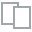
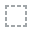
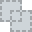
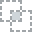
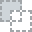
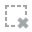
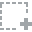
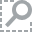
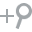
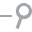
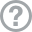
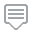
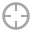
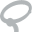
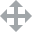
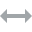
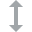
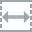
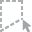
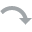
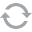
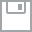
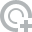
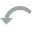
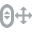
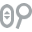
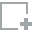
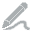
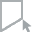
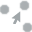
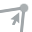
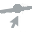

In [9]:
from dataprep.eda import create_report
create_report(df)

In [10]:
df.drop('Unnamed: 0', axis =1, inplace=True)

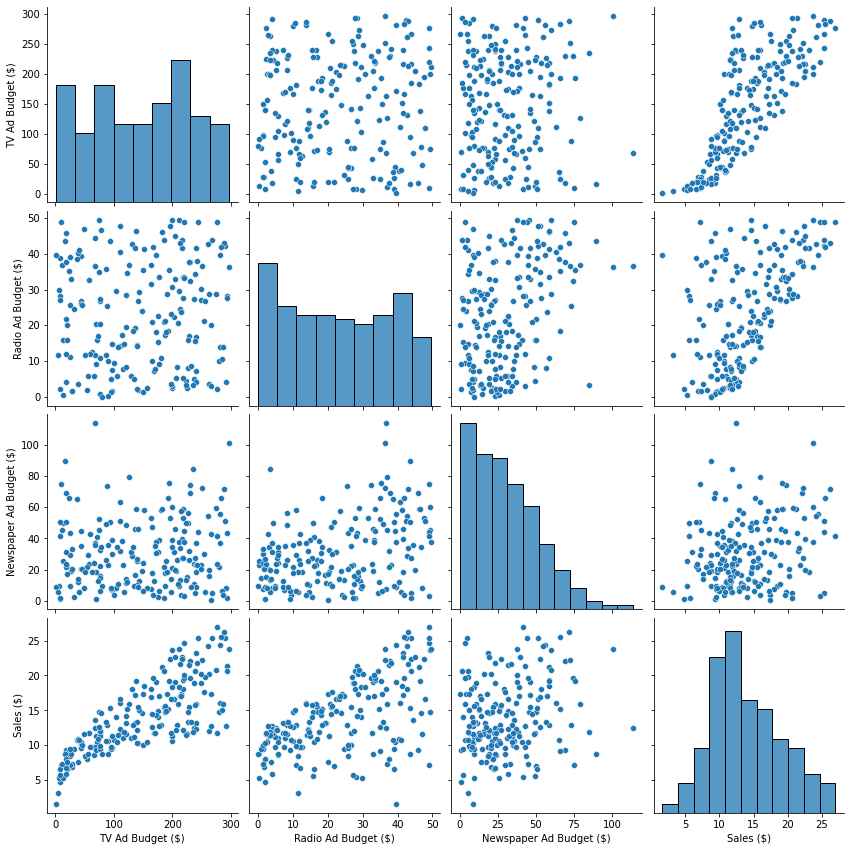

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, height=3);
plt.show()

## Modelling

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [13]:
df.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [14]:
X1 = df['TV Ad Budget ($)'].values.reshape(-1,1)
y1 = df['Sales ($)']

In [15]:
model = LinearRegression()

In [16]:
model.fit(X1, y1)

LinearRegression()

In [17]:
model.coef_

array([0.04753664])

In [18]:
model.intercept_

7.032593549127695

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


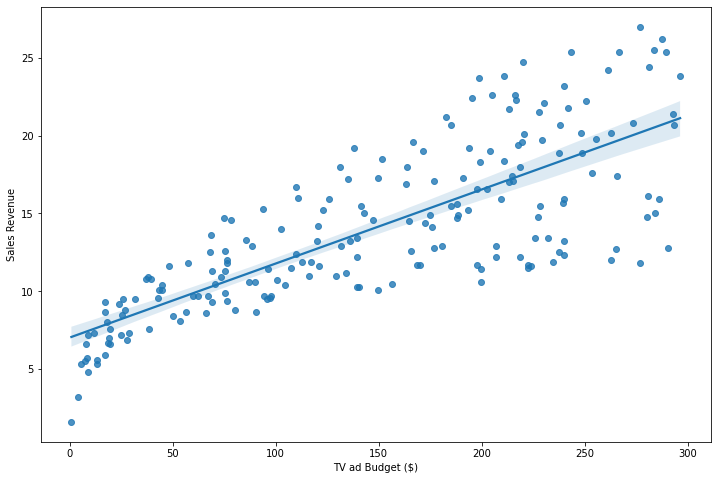

In [19]:
plt.figure(figsize=(12,8));
sns.regplot(X1, y1);
plt.xlabel('TV ad Budget ($)')
plt.ylabel("Sales Revenue")
plt.show();

## RANdom SAmple Consensus (RANSAC) Algorithm

In [20]:
X2 = df['TV Ad Budget ($)'].values.reshape(-1,1)
y2 = df['Sales ($)']

In [21]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor()

In [22]:
ransac.fit(X2, y2)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(0, 350, 1)
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))

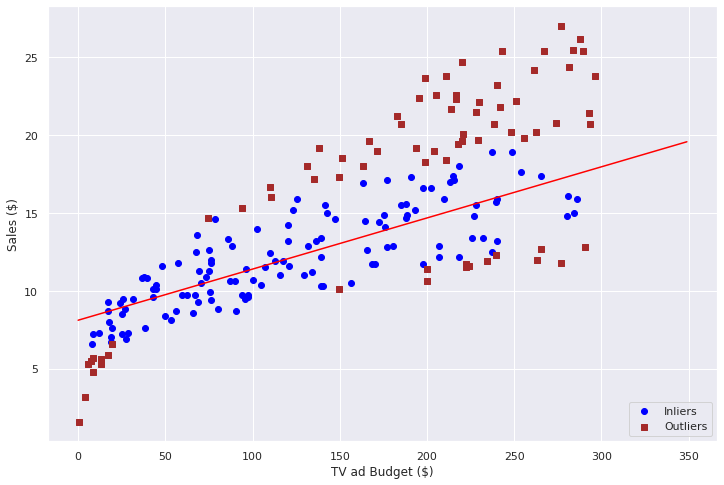

In [23]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,8));
plt.scatter(X2[inlier_mask], y2[inlier_mask], 
            c='blue', marker='o', label='Inliers')
plt.scatter(X2[outlier_mask], y2[outlier_mask],
            c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('TV ad Budget ($)')
plt.ylabel("Sales ($)")
plt.legend(loc='lower right')
plt.show()

# Performance Evaluation of Regression Model

In [24]:
df.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [25]:
X = df.iloc[:, :-1].values
y = df['Sales ($)'].values

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
y_train_pred = lr.predict(X_train)

In [31]:
y_test_pred = lr.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
mean_squared_error(y_train, y_train_pred)

2.406814755818906

In [34]:
mean_squared_error(y_test, y_test_pred)

4.402118291449685

In [35]:
from sklearn.metrics import r2_score

In [36]:
r2_score(y_train, y_train_pred)

0.9067114990146383

In [38]:
r2_score(y_test, y_test_pred)

0.8601145185017868

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [40]:
x = df[['TV Ad Budget ($)', 'Radio Ad Budget ($)']]

In [41]:
y = df[['Sales ($)']]

In [57]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [59]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((160, 2), (160, 1), (40, 2), (40, 1))

In [60]:
def performance(model,X_train,y_train,y_pred,y_test):
    print('Training Score:',model.score(X_train,y_train))
    print('Testing Score:',r2_score(y_test,y_pred))
    print('Other Metrics In Testing Data: ')
    print('MSE:',mean_squared_error(y_test,y_pred))
    print('MAE:',mean_absolute_error(y_test,y_pred))
    print('R2 Score:',r2_score(y_test,y_pred))

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [62]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [63]:
lr_pred = lr_model.predict(X_test)

In [64]:
lr_normal_score_train = lr_model.score(X_train, y_train)
lr_normal_score_test = lr_model.score(X_test, y_test)

In [65]:
performance(lr_model,X_train,y_train,lr_pred,y_test)

Training Score: 0.906590009997456
Testing Score: 0.8604541663186569
Other Metrics In Testing Data: 
MSE: 4.391429763581881
MAE: 1.3723979221023086
R2 Score: 0.8604541663186569


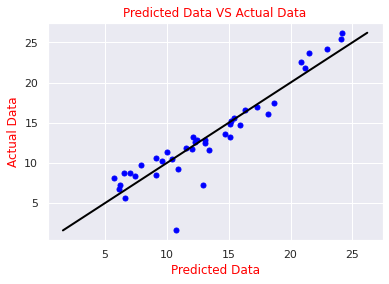

In [51]:
plt.scatter(lr_pred,y_test,c='blue',marker='o',s=25)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],c='black',lw=2)
plt.xlabel('Predicted Data',c='red')
plt.ylabel('Actual Data',c='red')
plt.title('Predicted Data VS Actual Data',c='red')
plt.show()

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
#Fitting the model
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

#The predicted data
dt_pred = dt.predict(X_test)

#The performance
performance(dt,X_train,y_train,dt_pred,y_test)

Training Score: 1.0
Testing Score: 0.9503009963434769
Other Metrics In Testing Data: 
MSE: 1.5639999999999996
MAE: 0.8549999999999999
R2 Score: 0.9503009963434769


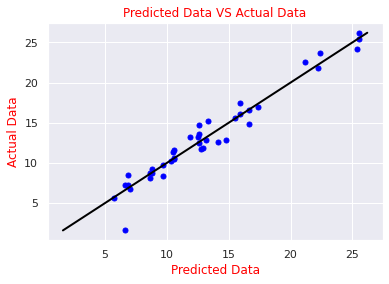

In [54]:
plt.scatter(dt_pred,y_test,c='blue',marker='o',s=25)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],c='black',lw=2)
plt.xlabel('Predicted Data',c='red')
plt.ylabel('Actual Data',c='red')
plt.title('Predicted Data VS Actual Data',c='red')
plt.show()

In [55]:
# Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Grid Search
params = [
    {'max_depth':list(range(5,20)),'min_samples_split':list(range(2,15)),"min_samples_leaf":[2,3,4]}
         ]
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=params,cv=10,n_jobs=-1)
grid_search.fit(X_train,y_train)
print('Best Estimator:',grid_search.best_estimator_)
print('Best Params:',grid_search.best_params_)
grid_pred = grid_search.predict(X_test)

performance(grid_search,X_train,y_train,grid_pred,y_test)

Best Estimator: DecisionTreeRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=3)
Best Params: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 3}
Training Score: 0.9940830208498115
Testing Score: 0.9428126918265666
Other Metrics In Testing Data: 
MSE: 1.7996527777777778
MAE: 0.9141666666666666
R2 Score: 0.9428126918265666


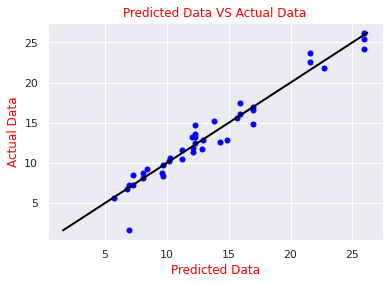

In [56]:
plt.scatter(grid_pred,y_test,c='blue',marker='o',s=25)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],c='black',lw=2)
plt.xlabel('Predicted Data',c='red')
plt.ylabel('Actual Data',c='red')
plt.title('Predicted Data VS Actual Data',c='red')
plt.show()